In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp, log
from scipy.integrate import quad

In [3]:
serie = pd.read_csv('langetur.csv', header=None)
len(serie)
#serie = serie[0:100000]

1000000

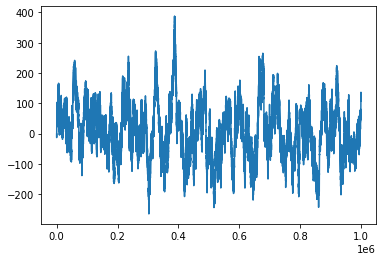

In [4]:
plt.plot(serie)

In [8]:
serie10 = pd.read_csv('langetur10.csv', header=None)
len(serie10)
#serie = serie[0:100000]

100001

In [10]:
serie10=serie10[1:]

In [ ]:
plt.plot(serie10[0])

In [ ]:
def removeDuplicates(listofElements):
    
    uniqueList = []    

    for elem in listofElements:
        if elem not in uniqueList:
            uniqueList.append(elem)
        
    return uniqueList

def entreescalaridade(lista):
    
    uniqueList = []    

    lista
    
    for i in range(0,len(lista)-1):
        if -(lista[i]-lista[i+1])>3:
            uniqueList.append(lista[i])
        
        
    return uniqueList




def define_escalas(Rmin,Rmax, Nescalas):
    
    escalas = []
    
    rrange = log(Rmax-Rmin)/Nescalas
    
    escalas.append(Rmin)
    
    for i in range( 0 , Nescalas ):
        
        x = i * rrange
        
        novaescala = round( Rmin+ exp(x)    )
        
        escalas.append(novaescala)
        
    escalas.append(Rmax)
    
    
    return escalas

def nmoment(x, c, n):
    return np.sum((x-c)**n) / len(x)

def igualaindices(Ur, Nescalas):
    Ufinal= []
    for i in range(0,Nescalas):
        Urr = np.zeros(len(Ur[i][~np.isnan(Ur[i])]))
        Urr = Ur[i][~np.isnan(Ur[i])]
        Ufinal.append(Urr)
    return Ufinal

In [ ]:
Nescalas = 20
Rmin = 10
Rmax = 5000
breaks = 30
entrescalas = 2

escalas = define_escalas(Rmin,Rmax, Nescalas)
#print(escalas)
escalas = removeDuplicates(escalas)
escalas = entreescalaridade(escalas)
#print(escalas)
Nescalas = len(escalas)
Nescalas

In [ ]:
Nescalas=6
escalas=[10,50,100,200,500,1000]
entrescalas=2

breaks=20

In [ ]:
incrementos = np.zeros((Nescalas,len(serie)))

Urr = np.zeros((Nescalas,len(serie))  )

HistUr = np.zeros((Nescalas,breaks))
HistDenseUr = np.zeros((Nescalas,breaks))

BreaksUr = np.zeros((Nescalas,breaks+1))

Entrebin = np.zeros((Nescalas,breaks))

DD1=np.zeros((Nescalas,breaks,entrescalas))
DD2=np.zeros((Nescalas,breaks,entrescalas))

D1=np.zeros((Nescalas,breaks))
D2=np.zeros((Nescalas,breaks))




In [ ]:
#np.shape(Entretau)
#Entretau

In [ ]:
Entretau=[]
for i in range(0,Nescalas-1):
    entre=[]
    entre.append(round((escalas[i+1]-escalas[i])/2) )
    entre.append(round((escalas[i+1]-escalas[i])/8 ) )
    Entretau.append(entre)

In [ ]:
print(Entretau)
print(escalas)

[[20, 5], [25, 6], [50, 12], [150, 38], [250, 62]]
[10, 50, 100, 200, 500, 1000]


In [ ]:
def CalculaHistogramaseIncrementos():
    for i in range(0,Nescalas):
    
    Urr[i] = np.reshape(serie.diff(escalas[i]).values,Urr[i].shape)
    Ur = igualaindices(Urr, Nescalas)
    hist = np.histogram(Ur[i][~np.isnan(Ur[i])],bins=breaks,density=False)
    hist2 = np.histogram(Ur[i][~np.isnan(Ur[i])],bins=breaks,density=True)
    
    HistUr[i] = hist[0]
    HistDenseUr[i] = hist2[0]
    BreaksUr[i] = hist[1]
    entr = np.zeros(breaks)
    
    for j in range(0,len(hist[0])):
        entr[j]=(hist[1][j+1]+hist[1][j])/2
        
    Entrebin[i]=entr
    

In [ ]:
def CalculaDD1DD2(Nescalas,breaks, entrescalas, )
    # D1 e D2
    
    DD1=np.zeros((Nescalas,breaks,entrescalas))
    DD2=np.zeros((Nescalas,breaks,entrescalas))

    D1=np.zeros((Nescalas,breaks))
    D2=np.zeros((Nescalas,breaks))


    for i in range(2,Nescalas):
        print(i)
        for j in range(0,breaks):
            #print(j)
            #entreescalas1=[]
            #entreescalas2=[]
            for k in range(0,entrescalas):
                entreescalas = serie.diff(escalas[i]-Entretau[i-1][k])
                entreescalas = np.array(entreescalas)
                entreescalas = entreescalas[~np.isnan(entreescalas)]
                for l in range(0,len(serie)-escalas[i]):
                    if BreaksUr[i][j] < Ur[i][l] < BreaksUr[i][j+1]:
                        DD1[i][j][k] = DD1[i][j][k] + entreescalas[l] - Entrebin[i][j]
                        DD2[i][j][k] = DD2[i][j][k] + (entreescalas[l] - Entrebin[i][j])**2
                        if np.isnan(DD2[i][j][k]):
                            print(entreescalas[l])
                            print(i,j,k)
                            print(l)
                if DD1[i][j][k]!=0: 
                    DD1[i][j][k] = (DD1[i][j][k]*escalas[i])/(HistUr[i][j]*(Entretau[i-1][k]))
                    DD2[i][j][k] = (DD2[i][j][k]*escalas[i])/(2*HistUr[i][j]*(Entretau[i-1][k]))

            D1[i][j] = (Entretau[i-1][1]*DD1[i][j][0] - Entretau[i-1][0]*DD1[i][j][1])/(Entretau[i-1][1]-Entretau[i-1][0])  #extrapolacao manual linear (só dois pontos)
            D2[i][j] = (Entretau[i-1][1]*DD2[i][j][0] - Entretau[i-1][0]*DD2[i][j][1])/(Entretu[i-1][1]-Entretau[i-1][0])

            return D1,D2, DD1, DD2

2
3
4
5


In [ ]:
def ajustespolinomiais(D1,D2): 
    polyD1 = np.zeros((breaks, 2))
    polyD2 = np.zeros(( breaks,5))
    ajuste = 1
    for i in range(0,Nescalas):
        print(i)
        polyD1[i] = np.polyfit(Entrebin[i][ajuste:(len(D1[2])-ajuste)],D1[i][ajuste:(len(D1[2])-ajuste)],1)
        polyD2[i] = np.polyfit(Entrebin[i][ajuste:(len(D2[2])-ajuste)],D2[i][ajuste:(len(D2[2])-ajuste)],0)
return polyD1, polyD2


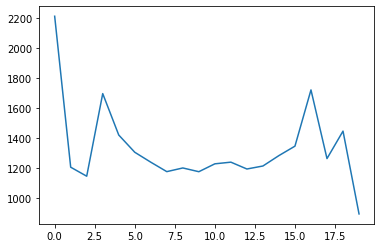

In [ ]:
plt.plot(D2[5])

In [ ]:
#a = entreescalas[
len(entreescalas)

20000

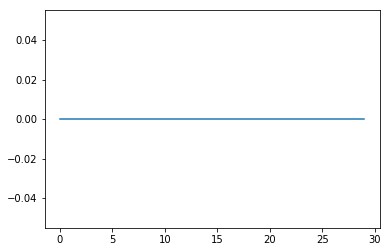

In [ ]:

plt.plot(D2[4])

In [ ]:
D2[2][3:len(D2[2])-1]

array([116.09258936, 116.60018339, 113.59792521, 108.12382948,
       107.88461297, 105.90314643, 106.11332013, 106.06144099,
       107.37596764, 109.30774802, 110.28524938, 109.93282193,
       111.54019628, 116.2566016 , 130.12517315, 135.12732631])

0
1
2
3
4
5


In [ ]:
a = np.logspace(1,3,10)
b = np.linspace(1,7,10)

In [ ]:
def testefit(x):
    return np.polyfit(a,b,1)[0]*x + np.polyfit(a,b,1)[1]

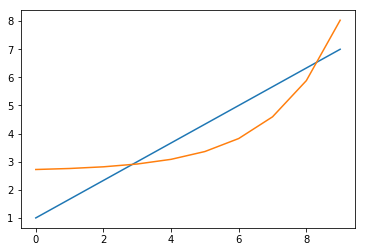

In [ ]:
plt.plot(b)
plt.plot(testefit(a))
plt.show()

In [ ]:


def CalculaPHI(PolyD1, PolyD2):
    PHI= np.zeros((Nescalas,breaks))
    for i in range(2, Nescalas-1):
        #def integrand(x):
            #return ((polyD1[i][0]*x +polyD1[i][1])/(polyD2[i][0]*x**4+polyD2[i][1]*x**3+polyD2[i][2]*x**2 +polyD2[i][3]*x+polyD2[i][4]))
        def d1(x):
            return (polyD1[i][0]*x+polyD1[i][1])
        def d2(x):
            return (polyD2[i][0]*x**4+polyD2[i][1]*x**3+polyD2[i][2]*x**2 +polyD2[i][3]*x+polyD2[i][4])
        def d20(x):
            return (polyD2[i][0])
        def integrand(x):
            return (d1(x))/(d2(x))

        for j in range(0,breaks):
            print(i,j)
            if D2[i][j]<0:
                PHI[i][j] = 0
            else:   
                PHI[i][j] = log(D2[i][j]) - quad(integrand, -np.inf, Entrebin[i][j])[0]
                #PHI[i][j] = log(d2(Entrebin[i][j])) - quad(integrand, -np.inf, Entrebin[i][j])[0]
    return PHI


2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 28
7 29
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
8 19
8 20
8 21
8 22
8 23
8 24
8 25
8 26
8 27
8 28
8 29
9 0
9 1
9 2
9 3
9 4


/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


13 24
13 25
13 26
13 27
13 28
13 29


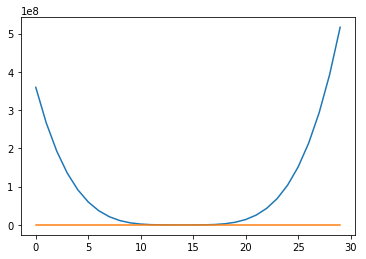

In [ ]:
i=5

def d1(x):
    return (polyD1[i][0]*x+polyD1[i][1])
def d2(x):
    return (polyD2[i][0]*x**4+polyD2[i][1]*x**3+polyD2[i][2]*x**2 +polyD2[i][3]*x+polyD2[i][4])

plt.plot(d2(Entrebin[i]))
plt.plot(D2[i])
plt.show()

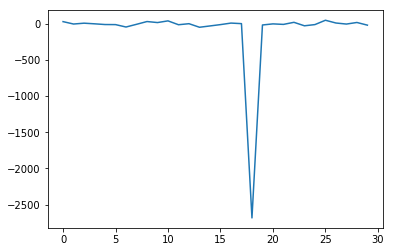

In [ ]:
plt.plot(PHI[11])

In [ ]:
Z = np.zeros((Nescalas))
Pst = np.zeros((Nescalas,breaks))

In [ ]:
PHI

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [ ]:

def CalculaZ(PHI):
    for i in range(2, Nescalas): 
        for j in range(0,breaks):
            print(i,j)
            Z[i] = Z[i] + exp(-PHI[i][j])*(Entrebin[i][2]-Entrebin[i][1])
    return PHI

2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24


OverflowError: math range error

0.08622432614796284

In [ ]:
def CalculaPst(PHI):
    for i in range(0, Nescalas):   
        for j in range(0,breaks):
            Pst[i][j] = (1/Z[i])*exp(-PHI[i][j])

OverflowError: math range error

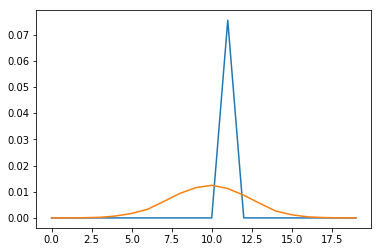

In [ ]:
i=4
plt.plot(Pst[i])
plt.plot(HistDenseUr[i])
plt.show()

In [ ]:
Dtstrajwat = np.zeros( (len(serie)) ) # as duas formas de calcular
Dtstraj = np.zeros( (len(serie)) )
Dtsmed = np.zeros( (len(serie)) )
Dtstot = np.zeros( (len(serie)) )

In [ ]:
def calcula Dtsmed(escalas, Nescalas, Ur, BreaksUr, Entrebin, PolyD1, PolyD2):
    for k in range(escalas[1],len(serie)-escalas[Nescalas-1]-escalas[1]):
        #print(k)
        for j in range(0, breaks-1):
             if  BreaksUr[0][j] <= Ur[0][k] < BreaksUr[0][j+1]:
                p = j
        for j in range(0, breaks-1):
             if  BreaksUr[Nescalas-1][j] <= Ur[Nescalas-1][k+escalas[Nescalas-1]-escalas[1]] < BreaksUr[Nescalas-1][j+1]:
                q = j
        Dtsmed[k] = - log(HistUr[0][p]/HistUr[Nescalas-1][q])
        
    return Dtsmed


IndexError: index 999000 is out of bounds for axis 0 with size 999000

In [ ]:
def calculaDtStraj(escalas, Nescalas, Ur, BreaksUr, Entrebin, PolyD1, PolyD2)
    for k in range(escalas[1],len(serie)-30):
        for i in range(0,Nescalas-1): 
            def dud2(x):
                return ((4*polyD2[i][0]*x**3+3*polyD2[i][1]*x**2+2*polyD2[i][2]*x**1 +polyD2[i][3]))     
            for j in range(0, breaks-1):
                if  BreaksUr[i][j] <= Ur[i][k+escalas[i]-escalas[1]] < BreaksUr[i][j+1]:
                    p = j 
            for j in range(0, breaks-1):
                if  BreaksUr[i+1][j] <= Ur[i+1][k+escalas[i+1]-escalas[1]] < BreaksUr[i+1][j+1]:
                    q = j 
            print (p,q,i)
        Dtstraj[k] = Dtstraj[k]+ ( Entrebin[i+1][q]-Entrebin[i][p])*((D1[i][p] - dud2(Entrebin[i][p]))/(D2[i][p])) 


In [ ]:
#Ur[3][13]#- Ur[4][12]
#Ur

nan

-0.1409919977350268


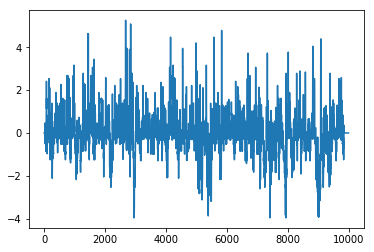

In [ ]:
print(np.mean(Dtsmed))
plt.plot(Dtsmed)

0.20105258395278727


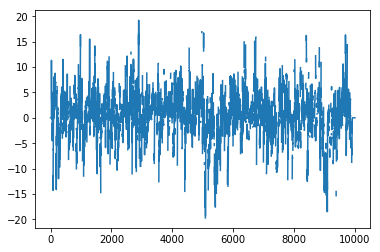

In [ ]:
print(np.mean(Dtstraj[~np.isnan(Dtstraj)]))
plt.plot(Dtstraj)

In [ ]:
Dtstot=Dtstraj+Dtsmed

0.05238572481033089


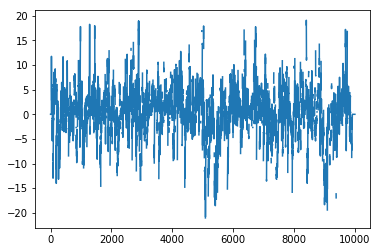

In [ ]:
print(np.mean(Dtstot[~np.isnan(Dtstot)]))
plt.plot(Dtstot)

In [ ]:
### AQUI CHECA O IFT

eStot = np.zeros(len(Dtstot))
for i in range(0,len(Dtstot)):
    eStot[i] = exp(-Dtstot[i])

In [ ]:
eStot

array([1., 1., 1., ..., 1., 1., 1.])

583781.9923114015


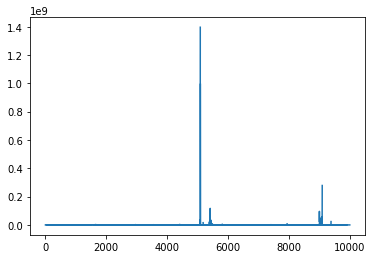

In [ ]:
print(np.mean(eStot[~np.isnan(eStot)]))
plt.plot(eStot)

In [ ]:
for j in range(0, breaks-1):
         if  BreaksUr[1][j] <= Ur[1][k] < BreaksUr[1][j]:
            p = j

In [ ]:
#STRUTURA


#S=np.zeros((escalas, ordens)) 
#for i in range(1,escalas):
#    S[i][1]=np.average(Ur[str(i)].dropna())
#    for j in range(2,ordens):
#        S[i][j]=nmoment(  Ur[str(i)] ,np.average(Ur[str(i)].dropna()),j)

In [ ]:
np.mean(Dtstraj[~np.isnan(Dtstraj)])

0.20105258395278727

In [ ]:
##x=np.random.normal(0,1,10)
##Y=np.random.normal(0,1,10)

In [ ]:
HistUr

array([[ 13.,  30.,  73., 128., 150., 229., 194.,  91.,  47.,  34.],
       [  7.,  21.,  56., 129., 165., 250., 191.,  92.,  56.,  17.],
       [ 26.,  34.,  97., 144., 185., 223., 152.,  73.,  35.,  10.]])

In [ ]:
np.savetxt("HistUr.csv", HistUr, delimiter=",")
np.savetxt("Entrebin.csv", Entrebin, delimiter=",")
np.savetxt("D1.csv", D1, delimiter=",")
np.savetxt("D2.csv", D2, delimiter=",")
np.savetxt("Dtstraj.csv", Dtstraj, delimiter=",")
np.savetxt("Dtsmed.csv", Dtsmed, delimiter=",")
np.savetxt("Dtstraj.csv", Dtstraj, delimiter=",")
np.savetxt("Dtsmed.csv", Dtsmed, delimiter=",")

NameError: name 'np' is not defined